In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


Product     0
Region      0
Sales       0
Profit      0
Quantity    4
dtype: int64
Selected Features based on correlation: ['Sales']


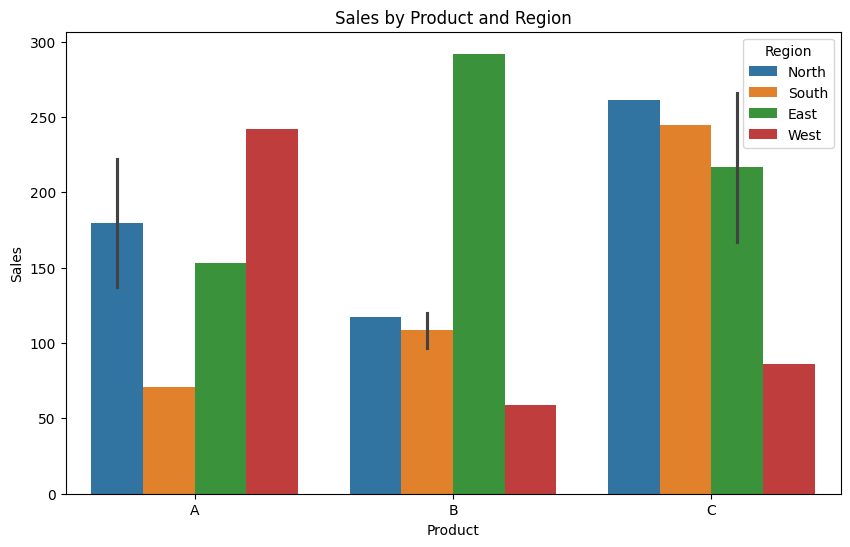

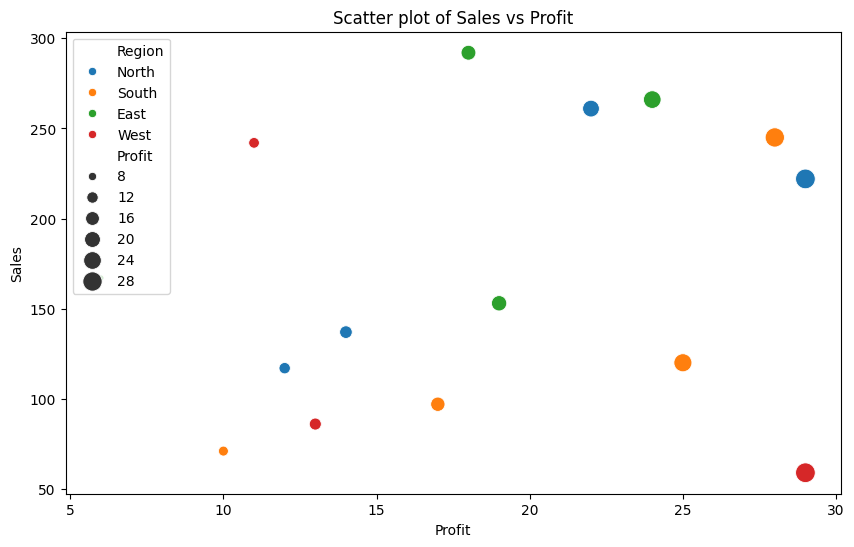

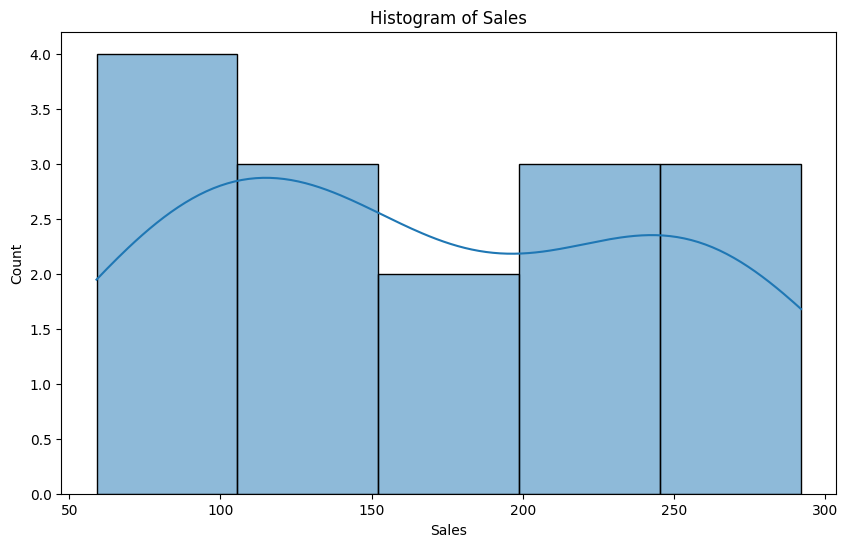

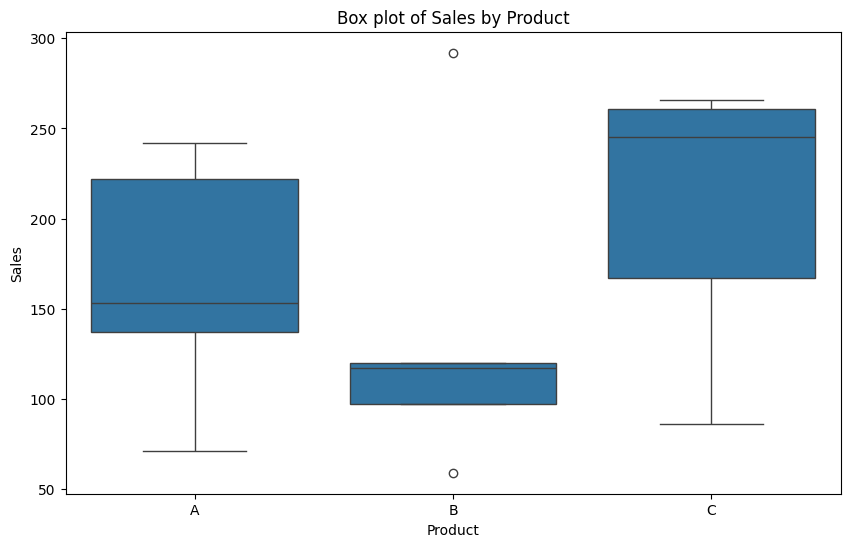

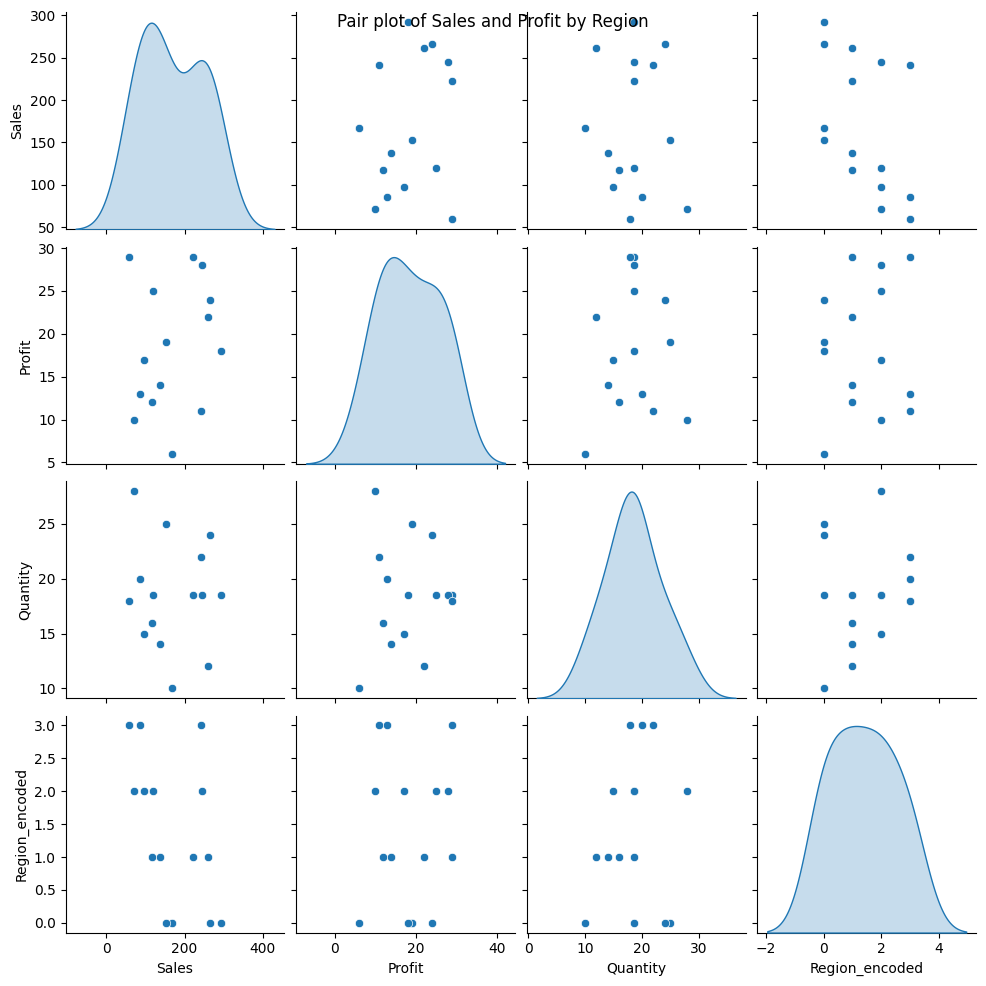

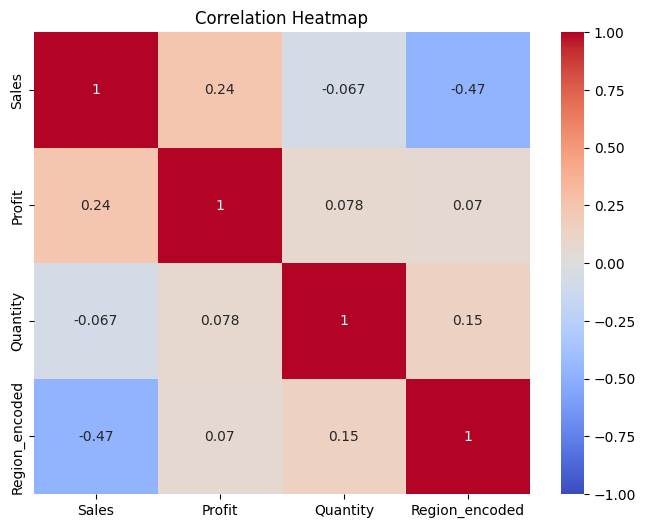

Correlation between Sales and Profit: 0.23701101401504968
Mean of Random: 57.06666666666667
Median of Random: 65.0
Standard Deviation of Random: 27.04352752420403
Dot Product of Sales and Profit: 48761
        PC1       PC2
0 -0.995349 -1.183071
1  0.872270  0.646570
2 -0.944444  2.655924
3  0.674280 -0.172817
4  0.266990  1.225385
Accuracy of Naive Bayes Model: 0.0
T-test - t-statistic: 7.3595681053242155, p-value: 5.15812175879016e-08
F-test - F-statistic: 54.16324269690547, p-value: 5.1581217587901524e-08
ANOVA - p-value: 3.310192055794972e-06
Variance of Sales: 5805.466666666666, Variance of Profit: 51.71555555555555


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix
from scipy.stats import ttest_ind, f_oneway, levene

# Generate a larger dataset with 15 rows using random values
np.random.seed(0)

data = {
    'Product': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'South', 'East'],
    'Sales': np.random.randint(50, 300, 15),
    'Profit': np.random.randint(5, 30, 15),
    'Quantity': [np.nan, 15, 10, 22, 16, np.nan, 25, 18, 12, 28, np.nan, 20, 14, np.nan, 24]
}

df = pd.DataFrame(data)

# Save the dataset to a CSV file
df.to_csv('sales_data_extended.csv', index=False)

# Read data from CSV file
df = pd.read_csv('sales_data_extended.csv')

# Check for missing values
print(df.isnull().sum())

# Fill missing values with mean
df['Quantity'].fillna(df['Quantity'].mean(), inplace=True)

# Encoding the 'Region' column
label_encoder = LabelEncoder()
df['Region_encoded'] = label_encoder.fit_transform(df['Region'])

# Drop the 'Product' and 'Region' columns
df_filtered = df.drop(columns=['Product', 'Region'])

# Compute correlation matrix
corr_matrix = df_filtered.corr()

# Filter attributes based on correlation
selected_features = corr_matrix[corr_matrix['Sales'].abs() > 0.5]['Sales'].index.tolist()
print(f'Selected Features based on correlation: {selected_features}')

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Sales', hue='Region', data=df)
plt.title('Sales by Product and Region')
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Profit', y='Sales', data=df, hue='Region', size='Profit', sizes=(20, 200))
plt.title('Scatter plot of Sales vs Profit')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=5, kde=True)
plt.title('Histogram of Sales')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product', y='Sales', data=df)
plt.title('Box plot of Sales by Product')
plt.show()

# Pair plot
sns.pairplot(df_filtered, diag_kind='kde')
plt.suptitle('Pair plot of Sales and Profit by Region')
plt.show()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Correlation between Sales and Profit
correlation = df['Sales'].corr(df['Profit'])
print(f'Correlation between Sales and Profit: {correlation}')

# Drop the 'Region' and 'Region_encoded' columns
df = df.drop(columns=['Region', 'Region_encoded'])

# Generate a random number
np.random.seed(0)
df['Random'] = np.random.randint(1, 100, df.shape[0])

# Compute aggregate statistics
mean = df['Random'].mean()
median = df['Random'].median()
std_dev = df['Random'].std()

print(f'Mean of Random: {mean}')
print(f'Median of Random: {median}')
print(f'Standard Deviation of Random: {std_dev}')

# Apply linear algebraic functions
dot_product = np.dot(df['Sales'], df['Profit'])
print(f'Dot Product of Sales and Profit: {dot_product}')

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print(principal_df.head())

# Split the Dataset into Features and Target
X = df[selected_features]
y = df['Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Naive Bayes Model
clf = GaussianNB()
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Naive Bayes Model: {accuracy}')

# T-test
t_stat, p_val_t = ttest_ind(df['Sales'], df['Profit'])
print(f'T-test - t-statistic: {t_stat}, p-value: {p_val_t}')

# F-test (Variance)
f_stat, p_val_f = f_oneway(df['Sales'], df['Profit'])
print(f'F-test - F-statistic: {f_stat}, p-value: {p_val_f}')

# ANOVA
p_val_anova = levene(df['Sales'], df['Profit']).pvalue
print(f'ANOVA - p-value: {p_val_anova}')

# Variance
var_sales = np.var(df['Sales'])
var_profit = np.var(df['Profit'])
print(f'Variance of Sales: {var_sales}, Variance of Profit: {var_profit}')


In [ ]:
iris=pd.read_csv('/content/iris (1).csv')

In [ ]:
iris
iris.shape

(150, 6)

In [ ]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Data-Manipulation
# Creating a Data Frame
df=pd.DataFrame(iris)
print(df)
# Adding a new column
df['C']=df['sepal_length']+df['petal_length']
print(df['C'])
# NumPy operations
arr=np.array([1,2,3])
arr_squared=np.square(arr)



     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
0       6.5
1       6.3
2       6.0
3       6.1
4       6.4
       ... 
145    11.9
146 

In [ ]:
data = iris.drop_duplicates(subset ="species",)
data

,sepal_length,sepal_width,petal_length,petal_width,species,C
0,5.1,3.5,1.4,0.2,Iris-setosa,6.5
50,7.0,3.2,4.7,1.4,Iris-versicolor,11.7
100,6.3,3.3,6.0,2.5,Iris-virginica,12.3


In [ ]:
iris.value_counts("species")

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
# Data Pre-Processing
# iris.drop(columns="ID",inplace=True)

In [ ]:
# Fill missing values with the mean of each column
df_filled = iris.fillna(iris.mean())

# Display the data after filling missing values
print("\nData after Filling Missing Values:")
print(df_filled)
iris['species'] = iris['species'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
print(iris)



Data after Filling Missing Values:
     sepal_length  sepal_width  petal_length  petal_width         species  \
0             5.1          3.5           1.4          0.2     Iris-setosa   
1             4.9          3.0           1.4          0.2     Iris-setosa   
2             4.7          3.2           1.3          0.2     Iris-setosa   
3             4.6          3.1           1.5          0.2     Iris-setosa   
4             5.0          3.6           1.4          0.2     Iris-setosa   
..            ...          ...           ...          ...             ...   
145           6.7          3.0           5.2          2.3  Iris-virginica   
146           6.3          2.5           5.0          1.9  Iris-virginica   
147           6.5          3.0           5.2          2.0  Iris-virginica   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

        C  
0     6.5  
1     6.3  
2  

<ipython-input-19-015a2711f332>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = iris.fillna(iris.mean())


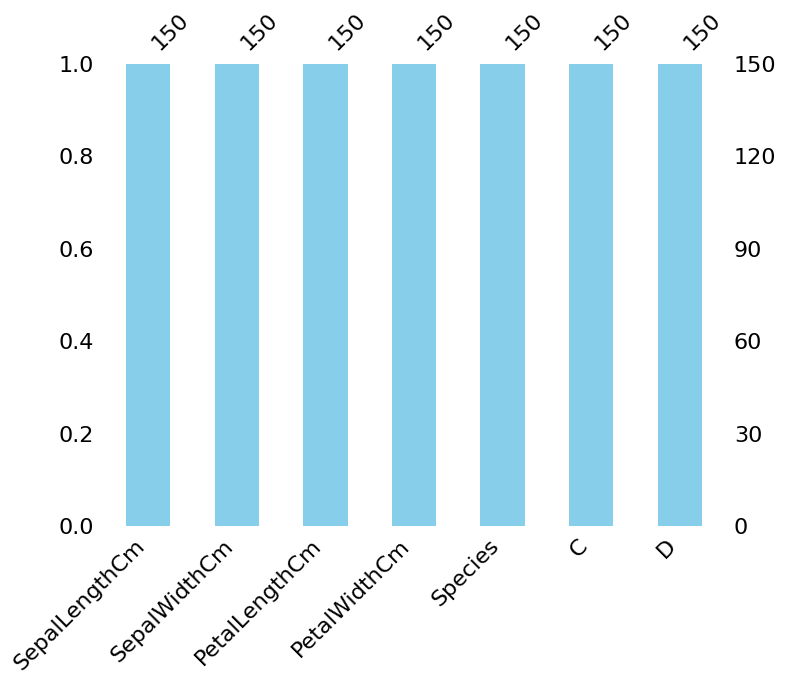

In [ ]:
import missingno as msno
msno.bar(iris,figsize=(8,6),color='skyblue')
plt.show()

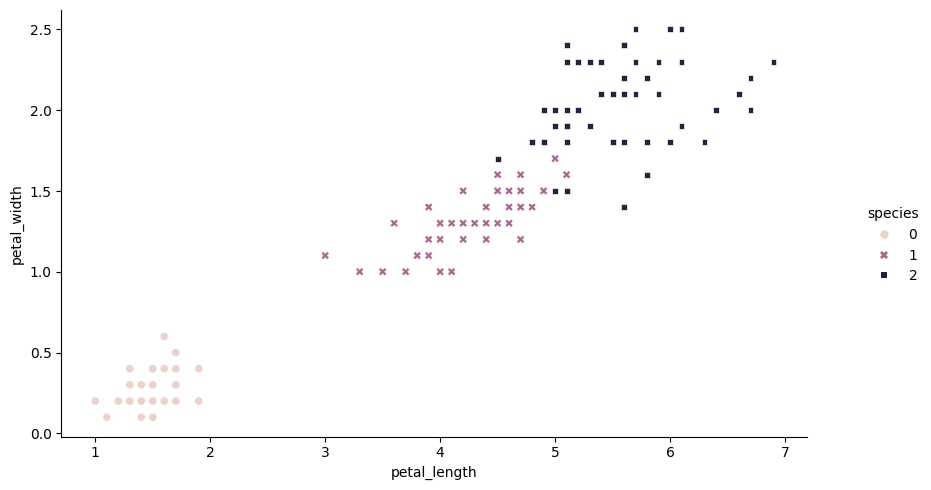

In [ ]:
g=sns.relplot(x='petal_length',y='petal_width',data=iris,hue='species',style='species')
g.fig.set_size_inches(10,5)
plt.show()

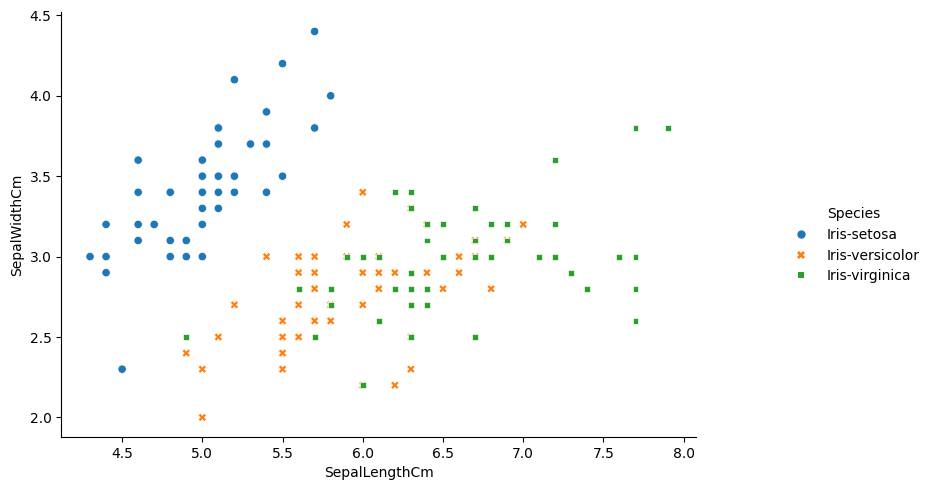

In [ ]:
# Data Visualization
g=sns.relplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

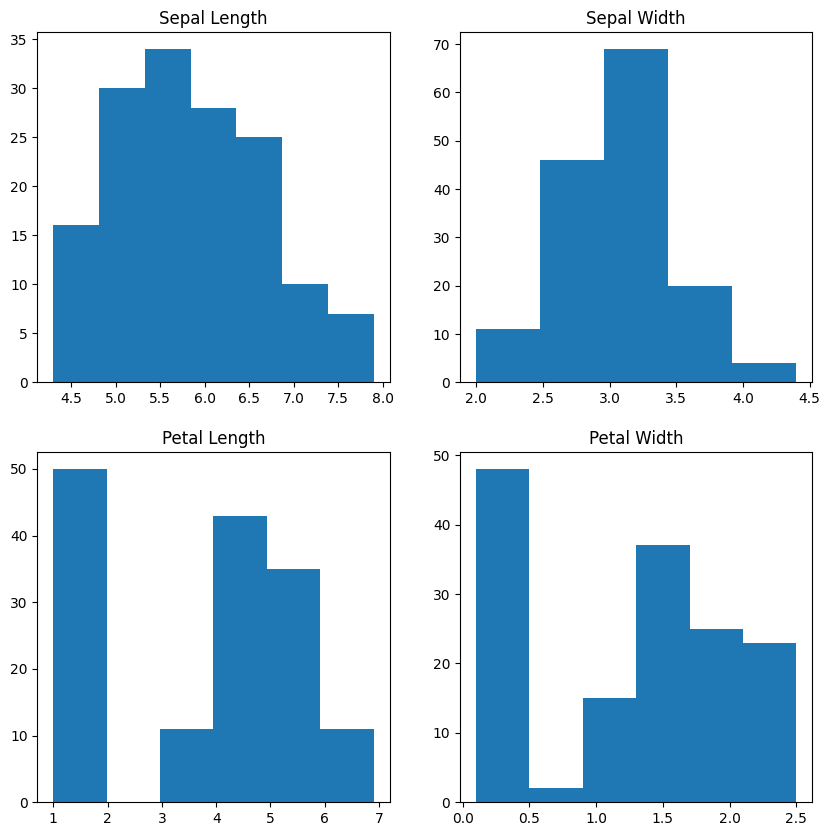

In [ ]:
# Histograms - Histograms allow seeing the distribution of data for various columns. It can be used for uni as well as bi-variate analysis.
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(iris['SepalLengthCm'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(iris['SepalWidthCm'], bins=5)

axes[1,0].set_title("Petal Length")
axes[1,0].hist(iris['PetalLengthCm'], bins=6)

axes[1,1].set_title("Petal Width")
axes[1,1].hist(iris['PetalWidthCm'], bins=6)


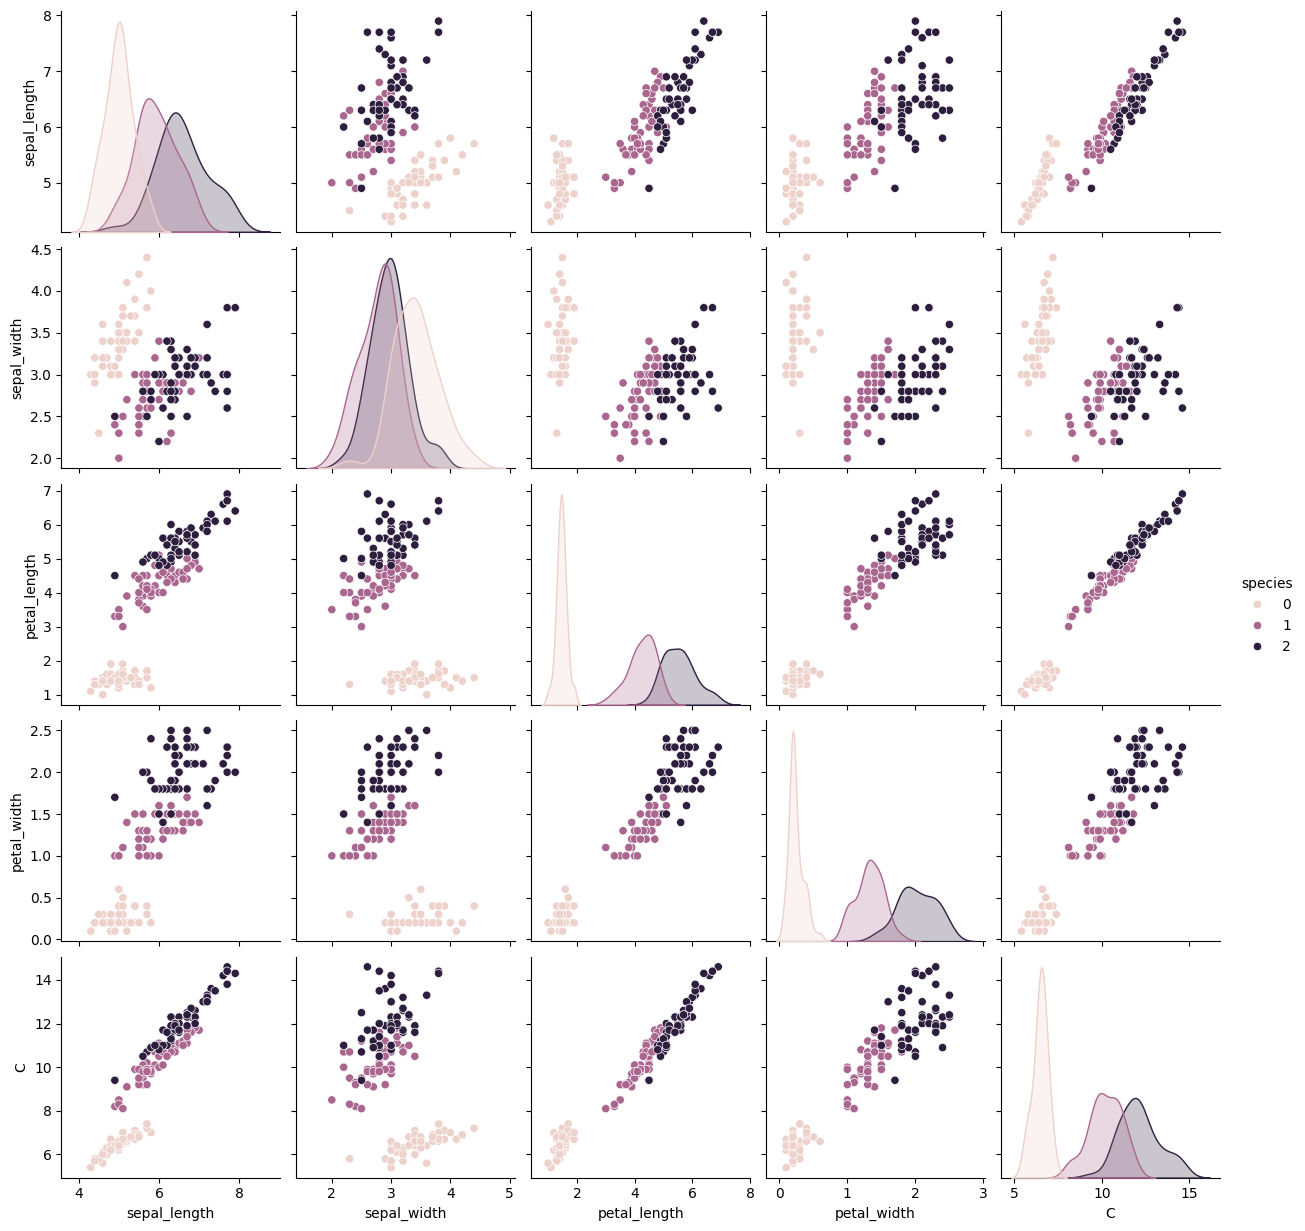

In [ ]:
# Pair Plot
sns.pairplot(data=iris,hue="species")
plt.show()

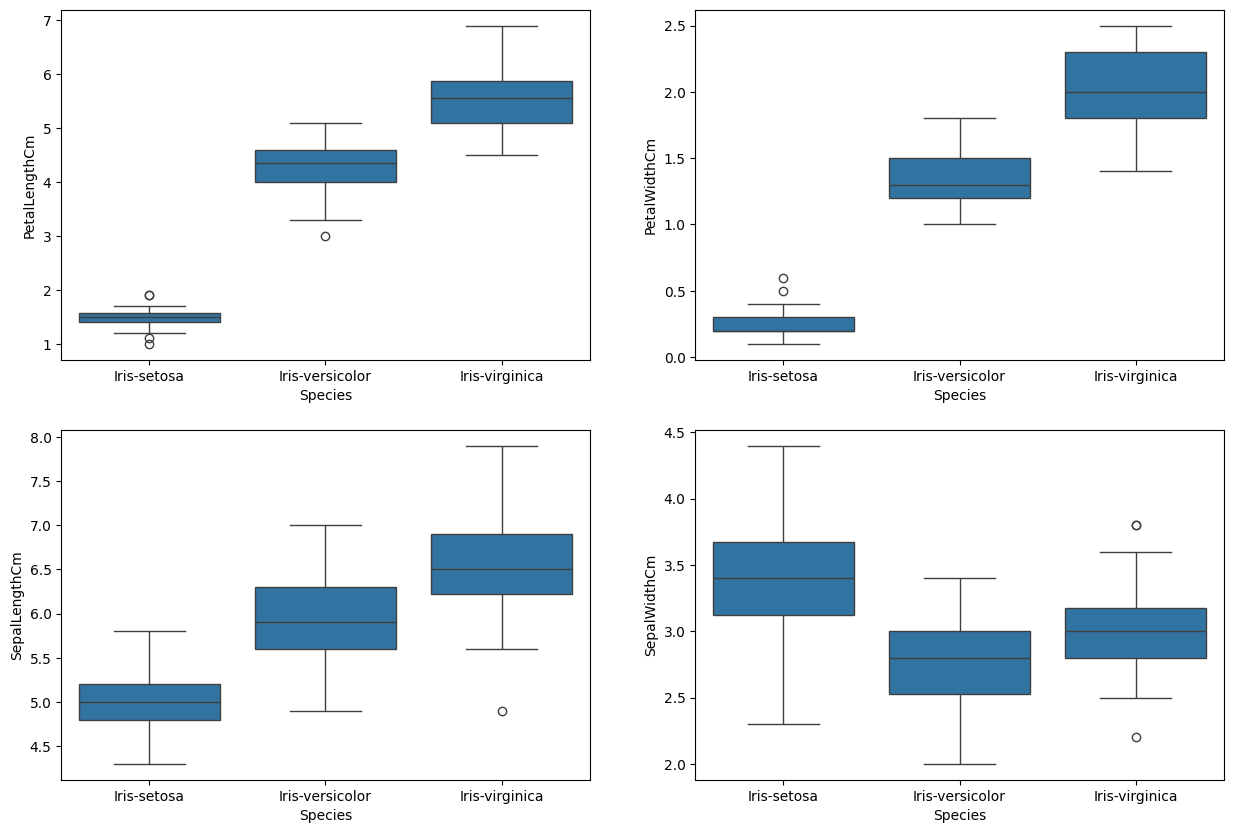

In [ ]:
# Box Plot
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=iris)
plt.show()

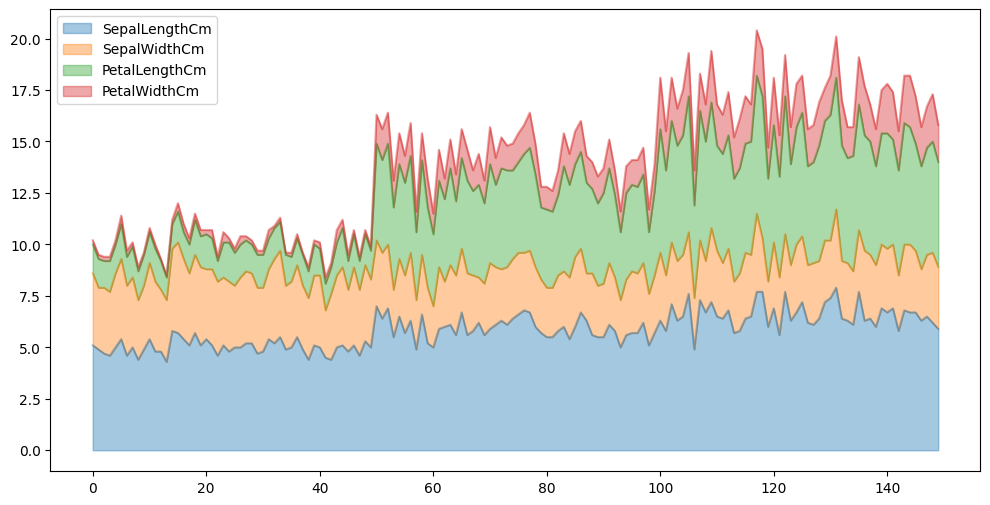

In [ ]:
# Area plot
iris.plot.area(y=['sepal_length','sepal_width','petal_length','petal_width'],alpha=0.4,figsize=(12, 6));

In [ ]:
# Correlation
iris.corr()

<ipython-input-29-f06874fc2239>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [ ]:
# Handling Correlation - Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. Any NA values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.
iris.corr(method='pearson')



<ipython-input-42-1a3eee43806c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr(method='pearson')


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<ipython-input-30-22a60b3c6422>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot=True,fmt="f").set_title("Corelation of attributes (petal length,width and sepal length,width) among Iris species")


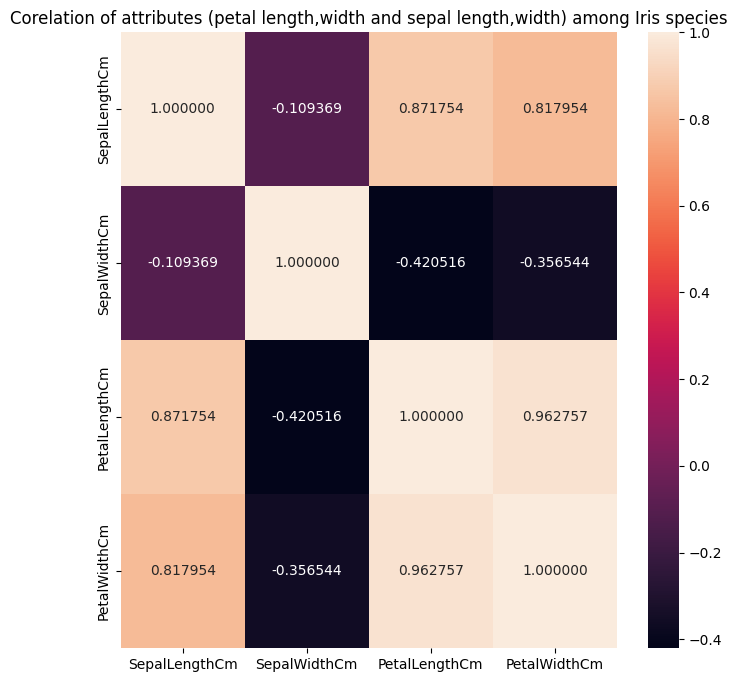

In [ ]:
# Heatmap
plt.subplots(figsize = (8,8))
sns.heatmap(iris.corr(),annot=True,fmt="f").set_title("Corelation of attributes (petal length,width and sepal length,width) among Iris species")
plt.show()

Old Shape:  (150, 6)
New Shape:  (146, 6)


<ipython-input-45-0a5de71ca4b0>:21: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['SepalWidthCm'], 25,
<ipython-input-45-0a5de71ca4b0>:24: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['SepalWidthCm'], 75,


<Axes: xlabel='SepalWidthCm'>

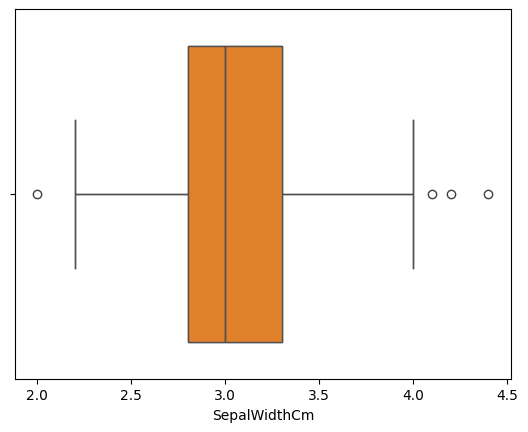

In [ ]:
# Handling Outliers - An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s dataframe.
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Iris.csv')

sns.boxplot(x='SepalWidthCm', data=df)
# Removing Outliers - For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.
# importing libraries
import sklearn

import pandas as pd
import seaborn as sns

# Load the dataset
df = pd.read_csv('Iris.csv')

# IQR
Q1 = np.percentile(df['SepalWidthCm'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df['SepalWidthCm'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(df['SepalWidthCm'] <= (Q1-1.5*IQR))

# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

sns.boxplot(x='SepalWidthCm', data=df)



In [ ]:
# Dividing data into features and labels - Splitting Dependent and Independent Variables
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)


In [ ]:
# Label Encoding - Convert textual data to integer data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Feayture Scaling - Technique done to normalize the independent variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [ ]:
X = iris.drop(['species'],axis=1)
y = iris.species

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)


In [ ]:
pca.get_covariance()

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

In [ ]:
# Building Machine Learning Models
# Metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

# Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Splitting The Data into Training And Testing Dataset
# Train and Test split - Now we will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
# Gaussian Naive Bayes - Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems. The technique is easiest to understand when described using binary or categorical input values.
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)


Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


In [ ]:
# Linear Support Vector Machine - Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However, it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well
linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)


Confusion matrix for SVC
 [[16  0  0]
 [ 0 15  3]
 [ 0  0 11]]
accuracy_SVC: 0.933
precision_SVC: 0.933
recall_SVC: 0.933
f1-score_SVC : 0.933


In [ ]:
# Page Rank Algorithm
import numpy as np

links = {
    'Node A': ['Node B', 'Node C', 'Node D'],
    'Node B': ['Node A', 'Node D'],
    'Node C': ['Node C'],
    'Node D': ['Node B', 'Node C']
}

num_iterations = 3
damping_factor = 0.8

num_pages = len(links)
pages = list(links.keys())
pagerank_scores = {page: 1 / num_pages for page in pages}

# Power iteration
for _ in range(num_iterations):
    new_pagerank_scores = {}
    for page in pages:
        incoming_pagerank = sum(pagerank_scores[in_link] / len(links[in_link]) for in_link in links if page in links[in_link])
        new_pagerank_scores[page] = (1 - damping_factor) / num_pages + damping_factor * incoming_pagerank
    pagerank_scores = new_pagerank_scores

for page, score in pagerank_scores.items():
    print(f"{page}: {score}")

max_page, max_score = max(pagerank_scores.items(), key=lambda x: x[1])
print(f"\nThe page with the highest PageRank weight is '{max_page}' with a score of {max_score}.")

Node A: 0.12066666666666666
Node B: 0.1571111111111111
Node C: 0.5651111111111111
Node D: 0.1571111111111111

The page with the highest PageRank weight is 'Node C' with a score of 0.5651111111111111.


In [ ]:
# Matrix Vector Multiplication using Map Reduce Algorithm
from functools import reduce

def map_multiply(entry):
    # Map function: Compute the product for a single element of the resulting matrix
    (i,), (A_row, vector_element) = entry
    return ((i,), A_row * vector_element)

def reduce_sum(result, entry):
    # Reduce function: Sum up the products for each element of the resulting matrix
    key, value = entry
    result[key] = result.get(key, 0) + value
    return result

def matrix_vector_multiply(matrix_A, vector_B):
    # Map: Generate key-value pairs for each product
    mapped_result = [
        ((i,), (matrix_A[i][j], vector_B[j]))
         for i in range(len(matrix_A))
        for j in range(len(vector_B))
    ]

    # Reduce: Sum up the products for each element of the resulting matrix
    reduced_result = reduce(reduce_sum, map(map_multiply, mapped_result), {})

    # Format the result into a vector
    result_vector = [reduced_result.get((i,), 0) for i in range(len(matrix_A))]

    return result_vector, reduced_result

# Example usage:
matrix_A = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

vector_B = [9, 8, 7]

result_vector, intermediate_result = matrix_vector_multiply(matrix_A, vector_B)

# Print the intermediate results during the reducing phase
print("Matrix:",matrix_A)
print("Vector:",vector_B)
print("Intermediate Result during Reducing:")
for key, value in intermediate_result.items():
    print(f"{key}: {value}")

# Print the final result
print("\nFinal Result:")
print(result_vector)

Matrix: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
Vector: [9, 8, 7]
Intermediate Result during Reducing:
(0,): 46
(1,): 118
(2,): 190

Final Result:
[46, 118, 190]


In [ ]:
# Simple Linear Regression Model with scikit-learn
import numpy as np
from sklearn.linear_model import LinearRegression
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])
x
y
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print(f"intercept: {new_model.intercept_}")
print(f"slope: {new_model.coef_}")
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")
x_new = np.arange(5).reshape((-1, 1))
x_new
y_new = model.predict(x_new)
y_new

coefficient of determination: 0.7158756137479542
intercept: 5.633333333333329
slope: [0.54]
intercept: [5.63333333]
slope: [[0.54]]
predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


array([5.63333333, 6.17333333, 6.71333333, 7.25333333, 7.79333333])

In [ ]:
# Multiple Linear Regression Model with scikit-learn
import numpy as np
from sklearn.linear_model import LinearRegression
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)
print(x)
print(y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print(f"predicted response:\n{y_pred}")
x_new = np.arange(10).reshape((-1, 2))
x_new
y_new = model.predict(x_new)
y_new

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]
coefficient of determination: 0.8615939258756776
intercept: 5.52257927519819
coefficients: [0.44706965 0.25502548]
predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


array([ 5.77760476,  7.18179502,  8.58598528,  9.99017554, 11.3943658 ])

In [ ]:
# Simple Linear Regression Model
import numpy as np
import matplotlib.pyplot as plt
def estimate_coef(x, y):
  n = np.size(x)

# mean of x and y vector
  m_x = np.mean(x)
  m_y = np.mean(y)

# calculating cross-deviation and deviation about x
  SS_xy = np.sum(y*x) - n*m_y*m_x
  SS_xx = np.sum(x*x) - n*m_x*m_x

# calculating regression coefficients
  b_1 = SS_xy / SS_xx
  b_0 = m_y - b_1*m_x

  return (b_0, b_1)
def plot_regression_line(x, y, b):
  # plotting the actual points as scatter plot
  plt.scatter(x, y, color = "m",marker = "o", s = 30)

  # predicted response vector
  y_pred = b[0] + b[1]*x

  # plotting the regression line
  plt.plot(x, y_pred, color = "g")

  # putting labels
  plt.xlabel('x')
  plt.ylabel('y')
def main():
  # observations / data
  x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
  y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

  # estimating coefficients
  b = estimate_coef(x, y)
  print("Estimated coefficients:\nb_0 = {}\\nb_1 = {}".format(b))




Coefficients:  [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]
Variance score: 0.720905667266174


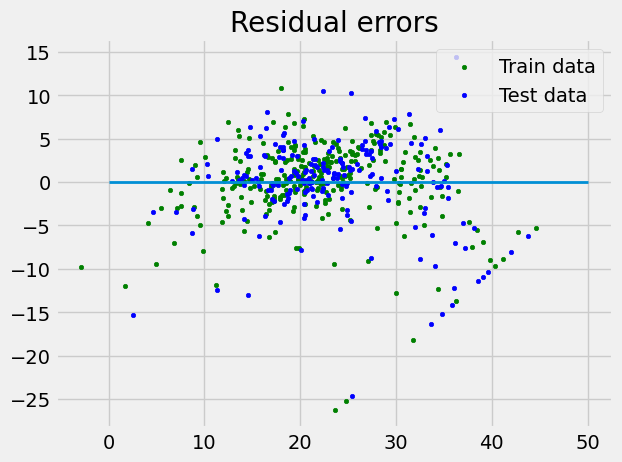

In [ ]:
# Multiple Linear Regression Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model, metrics
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+",skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :],raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]
X_train, X_test,\
y_train, y_test = train_test_split(X, y,test_size=0.4,random_state=1)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

# plot for residual error

# setting plot style
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(reg.predict(X_train),
			reg.predict(X_train) - y_train,
			color="green", s=10,
			label='Train data')

# plotting residual errors in test data
plt.scatter(reg.predict(X_test),
			reg.predict(X_test) - y_test,
			color="blue", s=10,
			label='Test data')

# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

# plotting legend
plt.legend(loc='upper right')

# plot title
plt.title("Residual errors")

# method call for showing the plot
plt.show()





In [ ]:
# Hidden markov Model

In [ ]:
pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 1.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
from hmmlearn import hmm

# Define the HMM model
model = hmm.GaussianHMM(n_components=2, covariance_type="full")

# Training data (sequence of observations)
X = np.array([[1.0], [1.5], [2.0], [1.8], [1.0]])

# Fit the model to the data
model.fit(X)

# Predict the hidden states of the sequence
hidden_states = model.predict(X)

# Print the results
print("Transition matrix:")
print(model.transmat_)
print("\nMeans and covariances of each state:")
for i in range(model.n_components):
    print(f"State {i + 1} - Mean: {model.means_[i][0]}, Covariance: {model.covars_[i][0][0]}")

print("\nPredicted hidden states:")
print(hidden_states)


Transition matrix:
[[6.67026513e-01 3.32973487e-01]
 [1.00000000e+00 8.78909692e-36]]

Means and covariances of each state:
State 1 - Mean: 1.766390883392832, Covariance: 0.045750526220346865
State 2 - Mean: 1.0, Covariance: 0.00500270030822178

Predicted hidden states:
[1 0 0 0 1]


In [ ]:
# import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm


In [ ]:
# Define the state space
states = ["Sunny", "Rainy"]
n_states = len(states)
print('Number of hidden states :',n_states)
# Define the observation space
observations = ["Dry", "Wet"]
n_observations = len(observations)
print('Number of observations :',n_observations)


Number of hidden states : 2
Number of observations : 2


In [ ]:
# Define the initial state distribution
state_probability = np.array([0.6, 0.4])
print("State probability: ", state_probability)

# Define the state transition probabilities
transition_probability = np.array([[0.7, 0.3],
								[0.3, 0.7]])
print("\nTransition probability:\n", transition_probability)
# Define the observation likelihoods
emission_probability= np.array([[0.9, 0.1],
								[0.2, 0.8]])
print("\nEmission probability:\n", emission_probability)


State probability:  [0.6 0.4]

Transition probability:
 [[0.7 0.3]
 [0.3 0.7]]

Emission probability:
 [[0.9 0.1]
 [0.2 0.8]]


In [ ]:
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = state_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability


In [ ]:
# Define the sequence of observations
observations_sequence = np.array([0, 1, 0, 1, 0, 0]).reshape(-1, 1)
observations_sequence


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [ ]:
# Predict the most likely sequence of hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)


Most likely hidden states: [0 1 1 1 0 0]


In [ ]:
log_probability, hidden_states = model.decode(observations_sequence,
											lengths = len(observations_sequence),
											algorithm ='viterbi' )

print('Log Probability :',log_probability)
print("Most likely hidden states:", hidden_states)


Log Probability : -6.360602626270058
Most likely hidden states: [0 1 1 1 0 0]


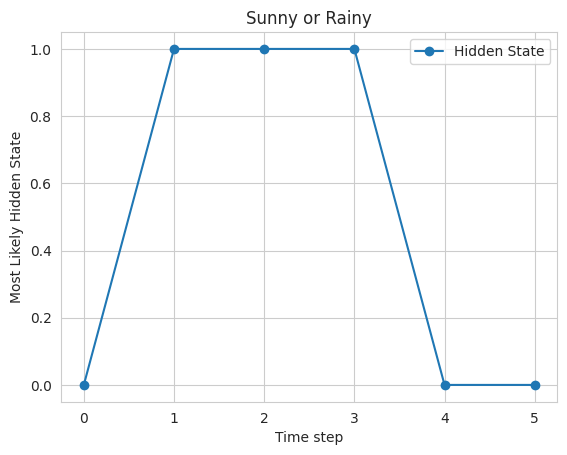

In [ ]:
# Plot the results
sns.set_style("whitegrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel('Time step')
plt.ylabel('Most Likely Hidden State')
plt.title("Sunny or Rainy")
plt.legend()
plt.show()


Most likely hidden states: [0 1 2 2 3 3 3 3]


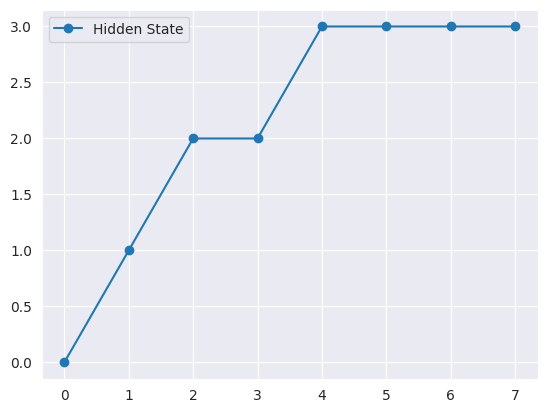

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

# Define the state space
states = ["Silence", "Word1", "Word2", "Word3"]
n_states = len(states)

# Define the observation space
observations = ["Loud", "Soft"]
n_observations = len(observations)

# Define the initial state distribution
start_probability = np.array([0.8, 0.1, 0.1, 0.0])

# Define the state transition probabilities
transition_probability = np.array([[0.7, 0.2, 0.1, 0.0],
									[0.0, 0.6, 0.4, 0.0],
									[0.0, 0.0, 0.6, 0.4],
									[0.0, 0.0, 0.0, 1.0]])

# Define the observation likelihoods
emission_probability = np.array([[0.7, 0.3],
								[0.4, 0.6],
								[0.6, 0.4],
								[0.3, 0.7]])

# Fit the model
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

# Define the sequence of observations
observations_sequence = np.array([0, 1, 0, 0, 1, 1, 0, 1]).reshape(-1, 1)

# Predict the most likely hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

# Plot the results
sns.set_style("darkgrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.legend()
plt.show()


In [ ]:
import numpy as np
from hmmlearn import hmm

# Define the HMM model
model = hmm.MultinomialHMM(n_components=2)

# Define probabilities for the model
model.startprob_ = np.array([0.7, 0.3])  # Initial probabilities for Hot and Cold states
model.transmat_ = np.array([[0.6, 0.4],   # Transition probabilities
                            [0.3, 0.7]])

model.emissionprob_ = np.array([[0.2, 0.5, 0.3],   # Emission probabilities for Hot state (1, 2, 3 ice-creams)
                                [0.4, 0.4, 0.2]])  # Emission probabilities for Cold state (1, 2, 3 ice-creams)

# Observations (ice-cream purchases)
observations = np.array([[3], [1], [3]])

# Reshape the observations if necessary
observations = observations.reshape(-1, 1)

# Fit the model to the data
model.fit(observations)

# Predict the hidden states of the sequence
hidden_states = model.predict(observations)

# Convert the hidden state indices to Hot or Cold labels
state_labels = ['Hot' if state == 0 else 'Cold' for state in hidden_states]

# Print the results
print("Most likely sequence of hidden states:")
print(state_labels)


https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Most likely sequence of hidden states:
['Cold', 'Cold', 'Cold']


In [ ]:
# Hidden Markov Model (HMM) using the Viterbi algorithm in Python with 3 states:
import numpy as np

class HiddenMarkovModel:
    def __init__(self, states, observations, start_prob, transition_prob, emission_prob):
        self.states = states
        self.observations = observations
        self.start_prob = start_prob
        self.transition_prob = transition_prob
        self.emission_prob = emission_prob
        self.num_states = len(states)
        self.num_observations = len(observations)

    def viterbi(self, observations):
        T = len(observations)
        path_prob = np.zeros((self.num_states, T))
        backtrace = np.zeros((self.num_states, T), dtype=int)

        # Initialization
        for s in range(self.num_states):
            path_prob[s, 0] = self.start_prob[s] * self.emission_prob[s, observations[0]]

        # Recursion
        for t in range(1, T):
            for s in range(self.num_states):
                prob = path_prob[:, t - 1] * self.transition_prob[:, s] * self.emission_prob[s, observations[t]]
                backtrace[s, t], path_prob[s, t] = max(enumerate(prob), key=lambda x: x[1])

        # Termination
        best_path_prob = np.max(path_prob[:, -1])
        best_final_state = np.argmax(path_prob[:, -1])

        # Backtracking
        best_path = [best_final_state]
        for t in range(T - 1, 0, -1):
            best_final_state = backtrace[best_final_state, t]
            best_path.insert(0, best_final_state)

        return best_path, best_path_prob

# Example usage:
states = ['Sunny', 'Rainy', 'Cloudy']
observations = [0, 1, 2]  # Example: 0 for 'umbrella', 1 for 'no umbrella', 2 for 'both'
start_prob = np.array([0.4, 0.3, 0.3])
transition_prob = np.array([[0.6, 0.2, 0.2],
                             [0.3, 0.4, 0.3],
                             [0.2, 0.3, 0.5]])
emission_prob = np.array([[0.9, 0.1, 0.8],
                           [0.2, 0.8, 0.1],
                           [0.5, 0.5, 0.4]])

hmm = HiddenMarkovModel(states, observations, start_prob, transition_prob, emission_prob)
observations_sequence = [0, 1, 2, 1]  # Example observation sequence
best_path, best_path_prob = hmm.viterbi(observations_sequence)
print("Best path:", [states[i] for i in best_path])
print("Probability of the best path:", best_path_prob)


Best path: ['Sunny', 'Rainy', 'Sunny', 'Rainy']
Probability of the best path: 0.002211840000000001


In [ ]:
import numpy as np

def viterbi(obs, states, start_prob, trans_prob, emit_prob):
    """
    Viterbi Algorithm for Hidden Markov Models.

    Args:
        obs: Sequence of observations.
        states: List of possible states.
        start_prob: Initial probability distribution of states.
        trans_prob: Transition probabilities between states.
        emit_prob: Emission probabilities of observations from states.

    Returns:
        tuple: A tuple containing the best path (sequence of states) and its probability.
    """
    n = len(obs)
    m = len(states)

    # Initialize viterbi matrix and backpointer matrix
    viterbi_mat = np.zeros((m, n))
    backpointer = np.zeros((m, n), dtype=int)

    # Initialize first column of viterbi matrix
    for s in range(m):
        viterbi_mat[s, 0] = start_prob[s] * emit_prob[s, obs[0]]
        backpointer[s, 0] = 0

    # Fill in the viterbi matrix and backpointer matrix
    for t in range(1, n):
        for s in range(m):
            max_prob = 0
            max_state = 0
            for s_prev in range(m):
                prob = viterbi_mat[s_prev, t-1] * trans_prob[s_prev, s] * emit_prob[s, obs[t]]
                if prob > max_prob:
                    max_prob = prob
                    max_state = s_prev
            viterbi_mat[s, t] = max_prob
            backpointer[s, t] = max_state

    # Backtrack to find the best path
    best_path_prob = np.max(viterbi_mat[:, -1])
    best_last_state = np.argmax(viterbi_mat[:, -1])
    best_path = [best_last_state]
    for t in range(n-1, 0, -1):
        best_last_state = backpointer[best_last_state, t]
        best_path.insert(0, best_last_state)

    return best_path, best_path_prob

# Example usage:
obs = [0, 1, 0, 2]  # Sequence of observations
states = [0, 1, 2]  # List of possible states
start_prob = np.array([0.6, 0.3, 0.1])  # Initial probability distribution of states
trans_prob = np.array([[0.7, 0.2, 0.1],
                       [0.3, 0.5, 0.2],
                       [0.2, 0.3, 0.5]])  # Transition probabilities between states
emit_prob = np.array([[0.5, 0.4, 0.1],
                      [0.1, 0.3, 0.6],
                      [0.2, 0.2, 0.6]])  # Emission probabilities of observations from states

best_path, best_path_prob = viterbi(obs, states, start_prob, trans_prob, emit_prob)
print("Best Path:", best_path)
print("Probability of the Best Path:", best_path_prob)

Best Path: [0, 0, 0, 1]
Probability of the Best Path: 0.003528


In [ ]:
# Viterbi algorithm
def viterbi(obs, states, start_prob, trans_prob, emit_prob):
    # Initialize Viterbi path probabilities and backpointers
    V = [{}]
    path = {}

    # Initialize base case
    for state in states:
        V[0][state] = start_prob[state] * emit_prob[state][obs[0]]
        path[state] = [state]

    # Iterate over observations
    for t in range(1, len(obs)):
        V.append({})
        new_path = {}

        # Compute Viterbi path probabilities
        for current_state in states:
            (prob, state) = max((V[t-1][prev_state] * trans_prob[prev_state][current_state] * emit_prob[current_state][obs[t]], prev_state) for prev_state in states)
            V[t][current_state] = prob
            new_path[current_state] = path[state] + [current_state]

        # Update the path
        path = new_path

    # Find the maximum probability and corresponding path
    (prob, state) = max((V[len(obs) - 1][final_state], final_state) for final_state in states)
    return (prob, path[state])

# Example usage
obs = ['normal', 'cold', 'dizzy']
states = ['Healthy', 'Fever']
start_prob = {'Healthy': 0.6, 'Fever': 0.4}
trans_prob = {
    'Healthy': {'Healthy': 0.7, 'Fever': 0.3},
    'Fever': {'Healthy': 0.4, 'Fever': 0.6}
}
emit_prob = {
    'Healthy': {'normal': 0.5, 'cold': 0.4, 'dizzy': 0.1},
    'Fever': {'normal': 0.1, 'cold': 0.3, 'dizzy': 0.6}
}

prob, path = viterbi(obs, states, start_prob, trans_prob, emit_prob)
print("Most likely hidden states:", path)
print("Probability of the path:", prob)

Most likely hidden states: ['Healthy', 'Healthy', 'Fever']
Probability of the path: 0.01512


In [ ]:
pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 2.1 MB/s eta 0:00:00


In [ ]:
pip install hidden_markov

  Preparing metadata (setup.py) ... done
  Created wheel for hidden_markov: filename=hidden_markov-0.3.2-py3-none-any.whl size=6889 sha256=162fc4e3e78738d7c3177dc96b1a8f8624efabd21354aae2e8d0940c388ca002
  Stored in directory: /root/.cache/pip/wheels/3c/56/8e/207019e308cefe1e24152109a944d0b8b7ef9f9863ddf5f47d
Successfully built hidden_markov


In [ ]:
import numpy as np
from hidden_markov import hmm
states=  ('S','R','C')
visible_state=('Shirt','Coat','Umbrella')

initial_prob=np.matrix('0.4 0.3 0.3')
transition_prob= np.matrix('0.8 0.15 0.05 ; 0.2 0.6 0.2 ; 0.3 0.3 0.4')
emission_prob=np.matrix('0.2 0.4 0.4 ; 0.6 0.2 0.2 ; 0.5 0.3 0.2')
observation= ('Shirt','Coat','Umbrella')
hmm_state=hmm(states,visible_state,initial_prob,transition_prob,emission_prob)
high_prob_combination=hmm_state.viterbi(observation)
print('The best optimum sequence of umbrella,coat,coat:',high_prob_combination)


The best optimum sequence of umbrella,coat,coat: ['S', 'S', 'S']


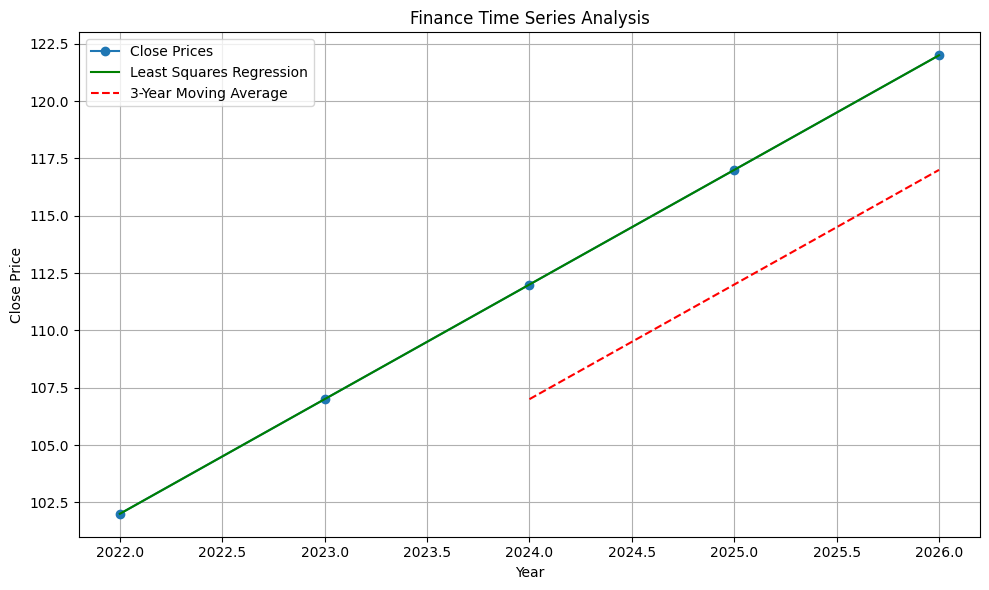

In [ ]:
# Time Series Analysis of Finance Data - Using moving average and least square method
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Hardcoded finance data
years = np.array([2022, 2023, 2024, 2025, 2026])  # Example years
close_prices = np.array([102, 107, 112, 117, 122])  # Example close prices

# Least squares method implementation
def least_squares(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.sum(x * x)
    sum_xy = np.sum(x * y)

    # Calculating coefficients of the line (slope and intercept)
    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x ** 2)
    intercept = (sum_y - slope * sum_x) / n

    return slope, intercept

# Perform linear regression
slope, intercept = least_squares(years, close_prices)

# Predict values using linear regression line
predicted_close_prices = slope * years + intercept

# Moving average calculation
def moving_average(data, window_size):
    cumsum = np.cumsum(data, dtype=float)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

# Calculate 3-year moving average of close prices
moving_avg_close = moving_average(close_prices, 3)

# Plotting
plt.figure(figsize=(10, 6))

# Plot close prices
plt.plot(years, close_prices, label='Close Prices', marker='o', linestyle='-')

# Plot least squares regression line
plt.plot(years, predicted_close_prices, label='Least Squares Regression', color='green', linestyle='-')

# Plot moving average
plt.plot(years[2:], moving_avg_close, label='3-Year Moving Average', color='red', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Finance Time Series Analysis')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Apriori Algorithm

In [ ]:
from collections import defaultdict

# Transactions data
transactions = {
    'T1': ['I1', 'I2', 'I5'],
    'T2': ['I2', 'I4'],
    'T3': ['I2', 'I3'],
    'T4': ['I1', 'I2', 'I4'],
    'T5': ['I1', 'I3'],
    'T6': ['I2', 'I3'],
    'T7': ['I1', 'I3'],
    'T8': ['I1', 'I2', 'I3', 'I5'],
    'T9': ['I1', 'I2', 'I3']
}

def get_frequent_1_itemsets(transactions, min_support):
    item_counts = defaultdict(int)
    for items in transactions.values():
        for item in items:
            item_counts[item] += 1
    return {item: count for item, count in item_counts.items() if count >= min_support}

def get_candidate_itemsets(prev_itemsets, k):
    candidate_itemsets = set()
    prev_itemsets = list(prev_itemsets)  # Convert dict_keys to list
    for i, itemset1 in enumerate(prev_itemsets):
        for itemset2 in prev_itemsets[i+1:]:
            if type(itemset1) == int and type(itemset2) == int:
                continue
            if itemset1[:-1] == itemset2[:-1]:
                new_itemset = tuple(sorted(set(itemset1) | set(itemset2)))
                if len(new_itemset) == k:
                    candidate_itemsets.add(new_itemset)
    return candidate_itemsets

def get_frequent_itemsets(transactions, min_support):
    frequent_1_itemsets = get_frequent_1_itemsets(transactions, min_support)
    frequent_itemsets = {1: frequent_1_itemsets}
    k = 2

    while True:
        candidate_itemsets = get_candidate_itemsets(frequent_itemsets[k-1].keys(), k)

        if not candidate_itemsets:
            break

        item_counts = defaultdict(int)

        for items in transactions.values():
            for candidate in candidate_itemsets:
                if set(candidate).issubset(set(items)):
                    item_counts[candidate] += 1

        frequent_itemsets[k] = {itemset: count for itemset, count in item_counts.items() if count >= min_support}
        k += 1

    return frequent_itemsets

def compute_support(itemset, transactions):
    count = 0
    for items in transactions.values():
        if set(itemset).issubset(set(items)):
            count += 1
    return count / len(transactions)

def compute_confidence(X, Y, transactions):
    XY = X + Y
    support_XY = compute_support(XY, transactions)
    support_X = compute_support(X, transactions)

    return support_XY / support_X if support_X > 0 else 0

def compute_lift(X, Y, transactions):
    support_Y = compute_support(Y, transactions)
    confidence_X_Y = compute_confidence(X, Y, transactions)

    return confidence_X_Y / support_Y if support_Y > 0 else 0

def print_metrics(frequent_itemsets, transactions):
    for k, itemsets in frequent_itemsets.items():
        print(f"Frequent {k}-itemsets:")
        for itemset, count in itemsets.items():
            if isinstance(itemset, int):
                items = [itemset]
            else:
                items = list(itemset)
            print(f"Itemset: {items}, Support: {compute_support(items, transactions):.2f}")

            if k > 1:
                for i in range(1, k):
                    X = items[:i]
                    Y = items[i:]
                    confidence = compute_confidence(X, Y, transactions)
                    lift = compute_lift(X, Y, transactions)
                    print(f"    Confidence({X} => {Y}): {confidence:.2f}, Lift({X} => {Y}): {lift:.2f}")

def apriori_algorithm(transactions, min_support):
    frequent_itemsets = get_frequent_itemsets(transactions, min_support)

    for k, itemsets in frequent_itemsets.items():
        print(f"Frequent {k}-itemsets:")
        for itemset, count in itemsets.items():
            if isinstance(itemset, int):
                print(f"{itemset}: {count}")
            else:
                print(f"{itemset}: {count}")

    print("\nMetrics:")
    print_metrics(frequent_itemsets, transactions)

min_support = 2
apriori_algorithm(transactions, min_support)


Frequent 1-itemsets:
I1: 6
I2: 7
I5: 2
I4: 2
I3: 6

Metrics:
Frequent 1-itemsets:
Itemset: ['I', '1'], Support: 0.00
Itemset: ['I', '2'], Support: 0.00
Itemset: ['I', '5'], Support: 0.00
Itemset: ['I', '4'], Support: 0.00
Itemset: ['I', '3'], Support: 0.00


In [ ]:
from itertools import combinations

class Apriori:
    def __init__(self, transactions, min_support, min_confidence):
        self.transactions = transactions
        self.min_support = min_support
        self.min_confidence = min_confidence
        self.itemsets = {}
        self.rules = []

    def get_support(self, itemset):
        count = 0
        for transaction in self.transactions:
            if itemset.issubset(transaction):
                count += 1
        return count / len(self.transactions)

    def get_itemsets(self, k):
        if k == 1:
            itemsets = [frozenset([item]) for transaction in self.transactions for item in transaction]
        else:
            itemsets = []
            for itemset in self.itemsets[k - 1]:
                for other_itemset in self.itemsets[k - 1]:
                    if itemset != other_itemset:
                        new_itemset = itemset.union(other_itemset)
                        if new_itemset not in itemsets and len(new_itemset) == k:
                            itemsets.append(new_itemset)
        return itemsets

    def generate_itemsets(self):
        k = 1
        while True:
            itemsets = self.get_itemsets(k)
            if not itemsets:
                break
            self.itemsets[k] = itemsets
            k += 1

    def generate_rules(self):
        for k, itemsets in self.itemsets.items():
            if k < 2:
                continue
            for itemset in itemsets:
                for i in range(1, len(itemset)):
                    for antecedent in combinations(itemset, i):
                        antecedent = frozenset(antecedent)
                        consequent = itemset - antecedent
                        support_itemset = self.get_support(itemset)
                        support_antecedent = self.get_support(antecedent)
                        if support_antecedent == 0:
                            continue
                        confidence_rule = support_itemset / support_antecedent
                        support_consequent = self.get_support(consequent)
                        if support_consequent == 0:
                            continue
                        lift = confidence_rule / support_consequent
                        if support_itemset >= self.min_support and confidence_rule >= self.min_confidence:
                            self.rules.append((antecedent, consequent, support_itemset, confidence_rule, lift))

    def fit(self):
        self.generate_itemsets()
        self.generate_rules()

# Example usage
transactions = [
    {'apple', 'beer', 'rice'},
    {'apple', 'beer', 'diaper'},
    {'apple', 'beer', 'rice'},
    {'apple', 'diaper'},
    {'beer', 'diaper'}
]

min_support = 0.5
min_confidence = 0.5

apriori = Apriori(transactions, min_support, min_confidence)
apriori.fit()

print("Frequent Itemsets:")
for k, itemsets in apriori.itemsets.items():
    print(f"k = {k}: {itemsets}")

print("\nAssociation Rules:")
for rule in apriori.rules:
    antecedent, consequent, support, confidence, lift = rule
    print(f"{antecedent} => {consequent} (support: {support}, confidence: {confidence}, lift: {lift})")

Frequent Itemsets:
k = 1: [frozenset({'apple'}), frozenset({'beer'}), frozenset({'rice'}), frozenset({'apple'}), frozenset({'beer'}), frozenset({'diaper'}), frozenset({'apple'}), frozenset({'beer'}), frozenset({'rice'}), frozenset({'apple'}), frozenset({'diaper'}), frozenset({'beer'}), frozenset({'diaper'})]
k = 2: [frozenset({'apple', 'beer'}), frozenset({'apple', 'rice'}), frozenset({'apple', 'diaper'}), frozenset({'beer', 'rice'}), frozenset({'beer', 'diaper'}), frozenset({'diaper', 'rice'})]
k = 3: [frozenset({'apple', 'beer', 'rice'}), frozenset({'apple', 'beer', 'diaper'}), frozenset({'apple', 'diaper', 'rice'}), frozenset({'beer', 'rice', 'diaper'})]
k = 4: [frozenset({'rice', 'apple', 'beer', 'diaper'})]

Association Rules:
frozenset({'apple'}) => frozenset({'beer'}) (support: 0.6, confidence: 0.7499999999999999, lift: 0.9374999999999998)
frozenset({'beer'}) => frozenset({'apple'}) (support: 0.6, confidence: 0.7499999999999999, lift: 0.9374999999999998)


In [ ]:
# Install mlxtend library if you haven't
# pip install mlxtend

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Sample transaction data (itemsets bought together)
transactions = [
    ['Milk', 'Bread', 'Diapers'],
    ['Milk', 'Beer', 'Chips'],
    ['Bread', 'Beer', 'Chips', 'Diapers'],
    ['Milk', 'Bread', 'Beer', 'Chips'],
    ['Milk', 'Bread', 'Beer']
]

# Initialize TransactionEncoder
te = TransactionEncoder()
# Transform the transaction data into a one-hot encoded DataFrame
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Generate frequent itemsets with a minimum support of 0.5
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

# Generate association rules with a minimum threshold for confidence and lift
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
# Improved output presentation with arrow notation
for index, row in rules.iterrows():
    antecedents = row['antecedents']
    consequents = row['consequents']
    support = row['support']
    confidence = row['confidence']
    lift = row['lift']
    print(f"{set(antecedents)} -> {set(consequents)}")
    print(f"Support: {support}")
    print(f"Confidence: {confidence}")
    print(f"Lift: {lift}")
    print("-------------------------------")


Frequent Itemsets:
   support       itemsets
0      0.8         (Beer)
1      0.8        (Bread)
2      0.6        (Chips)
3      0.8         (Milk)
4      0.6  (Beer, Bread)
5      0.6  (Beer, Chips)
6      0.6   (Beer, Milk)
7      0.6  (Milk, Bread)

Association Rules:
{'Beer'} -> {'Chips'}
Support: 0.6
Confidence: 0.7499999999999999
Lift: 1.2499999999999998
-------------------------------
{'Chips'} -> {'Beer'}
Support: 0.6
Confidence: 1.0
Lift: 1.25
-------------------------------


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# SIMRANK Algorithm

In [ ]:
import numpy as np

def simrank(graph, C=0.8, max_iter=100, tol=1e-4):
    """
    Compute SimRank similarity scores for nodes in a graph.

    Parameters:
    - graph (numpy.ndarray): Adjacency matrix of the graph.
    - C (float): Decay factor, should be in (0, 1].
    - max_iter (int): Maximum number of iterations.
    - tol (float): Convergence tolerance.

    Returns:
    - numpy.ndarray: SimRank similarity matrix.
    """

    # Normalize the graph
    out_degree = np.sum(graph, axis=1)
    in_degree = np.sum(graph, axis=0)
    graph = graph / out_degree[:, np.newaxis]

    # Initialize the SimRank matrix
    n = graph.shape[0]
    sim_matrix = np.identity(n)

    for iter_count in range(1, max_iter + 1):
        prev_sim_matrix = np.copy(sim_matrix)

        for i in range(n):
            for j in range(n):
                if i == j:
                    continue

                s_ij = 0
                for m in range(n):
                    for n in range(n):
                        s_ij += (graph[i, m] * graph[j, n] * prev_sim_matrix[m, n])

                sim_matrix[i, j] = C * s_ij / (out_degree[i] * out_degree[j])

        # Print similarity matrix after 1st, 2nd, and 3rd iterations
        if iter_count in [1, 2, 3]:
            print(f"Iteration {iter_count}:\n{sim_matrix}\n")

        # Check for convergence
        if np.allclose(sim_matrix, prev_sim_matrix, atol=tol):
            break

    return sim_matrix

# Adjacency matrix for the given graph
graph = np.array([
    [0, 1, 1, 1, 0],
    [1, 0, 1, 1, 0],
    [1, 1, 0, 0, 1],
    [1, 1, 0, 0, 1],
    [0, 0, 1, 1, 0]
])

# Compute SimRank similarity matrix
similarity_matrix = simrank(graph)
print("SimRank Similarity Matrix:")
print(similarity_matrix)


Iteration 1:
[[1.         0.00987654 0.         0.         0.        ]
 [0.         1.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.        ]]

Iteration 2:
[[1.         0.00987654 0.         0.         0.        ]
 [0.         1.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.        ]]

SimRank Similarity Matrix:
[[1.         0.00987654 0.         0.         0.        ]
 [0.         1.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.        ]]


In [ ]:
import numpy as np

def calculate_similarity_rank(matrix, damping_factor, num_iterations):
    # Normalize the matrix
    matrix_norm = matrix / matrix.sum(axis=0)

    # Initialize the rank vector
    rank = np.ones(matrix.shape[0]) / matrix.shape[0]

    # Perform iterations
    for i in range(num_iterations):
        # Damping factor applied only for the first iteration
        if i == 0:
            rank = (1 - damping_factor) + damping_factor * np.dot(matrix_norm, rank)
        else:
            rank = np.dot(matrix_norm, rank)

    return rank

# Example usage:
# User input matrix (example)
user_input_matrix = np.array([[0,0,0,1/3,1/3],
                              [0,0,0,1/3,1/3],
                              [0,0,0,1/3,1/3],
                              [1/2,1/2,1/2,0,0],
                              [1/2,1/2,1/2,0,0]])

# Damping factor for the first iteration
damping_factor_first_iteration = 0.85

# Damping factor for subsequent iterations
damping_factor = 1.0

# Number of iterations
num_iterations = 3

# Calculate similarity rank for the first iteration
similarity_rank_first_iteration = calculate_similarity_rank(user_input_matrix, damping_factor_first_iteration, 1)
print("Similarity rank for the first iteration:", similarity_rank_first_iteration)

# Calculate similarity rank for the second iteration
similarity_rank_second_iteration = calculate_similarity_rank(user_input_matrix, damping_factor, 2)
print("Similarity rank for the second iteration:", similarity_rank_second_iteration)

# Calculate similarity rank for the third iteration
similarity_rank_third_iteration = calculate_similarity_rank(user_input_matrix, damping_factor, 3)
print("Similarity rank for the third iteration:", similarity_rank_third_iteration)


Similarity rank for the first iteration: [0.26333333 0.26333333 0.26333333 0.405      0.405     ]
Similarity rank for the second iteration: [0.2 0.2 0.2 0.2 0.2]
Similarity rank for the third iteration: [0.13333333 0.13333333 0.13333333 0.3        0.3       ]


In [ ]:
pip install networkx


In [ ]:
import networkx as nx

def simrank(G, node1, node2, C=0.8, max_iter=100, tol=1e-4):

    if node1 == node2:
        return 1.0
    neighbors1 = list(G.neighbors(node1))
    neighbors2 = list(G.neighbors(node2))
    if not neighbors1 or not neighbors2:
        return 0.0
    # Initialize similarity matrix
    sim_matrix = [[0.0] * len(neighbors2) for _ in range(len(neighbors1))]
    # Initialize previous similarity matrix
    prev_sim_matrix = [[-1.0] * len(neighbors2) for _ in range(len(neighbors1))]
    # Perform SimRank iterations
    for _ in range(max_iter):
        for i, n1 in enumerate(neighbors1):
            for j, n2 in enumerate(neighbors2):
                if n1 == n2:
                    sim_matrix[i][j] = 1.0
                else:
                    s = sum(prev_sim_matrix[k1][k2] for k1 in range(len(neighbors1)) for k2 in range(len(neighbors2)) if G.has_edge(neighbors1[k1], neighbors2[k2]))
                    sim_matrix[i][j] = (C / (len(neighbors1) * len(neighbors2))) * s
        # Check for convergence
        if all(abs(sim_matrix[i][j] - prev_sim_matrix[i][j]) < tol for i in range(len(neighbors1)) for j in range(len(neighbors2))):
            break
        # Update previous similarity matrix
        prev_sim_matrix = [row.copy() for row in sim_matrix]

    # Return the similarity between node1 and node2
    try:
        return sim_matrix[neighbors1.index(node1)][neighbors2.index(node2)]
    except ValueError:
        return 0.0  # If the nodes are not neighbors, return 0

# Example usage
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (4, 2), (4, 3), (5, 2), (5, 3)])
node1 = 4
node2 = 3
similarity = simrank(G, node1, node2)
print(f"SimRank similarity between nodes {node1} and {node2}: {similarity}")
